In [7]:
import sys

sys.path.append('..')

(array([ 7.,  7.,  9.,  9.,  7.,  6., 12.,  9., 16., 11., 10.,  8., 11.,
        14.,  9.,  8., 14., 10., 10., 15., 14.,  9., 14., 12., 12.,  7.,
        10., 15.,  5.,  7.,  8., 15.,  9.,  9.,  9., 11., 10.,  4.,  8.,
         6., 13.,  9.,  6.,  9.,  4., 14., 15.,  9.,  4., 11.,  9.,  9.,
        14., 14.,  7., 13., 13., 10., 11., 16., 12.,  6., 13.,  9., 15.,
        12., 14., 11., 12., 10.,  9.,  7.,  7.,  7., 10.,  9., 14., 20.,
         8., 12.,  7.,  5.,  8., 14., 12., 11., 11.,  7., 11.,  6.,  7.,
         5.,  8., 10., 15.,  7.,  6., 11.,  7.,  9.]),
 array([9.02521870e-04, 1.08761452e-02, 2.08497685e-02, 3.08233919e-02,
        4.07970152e-02, 5.07706385e-02, 6.07442618e-02, 7.07178852e-02,
        8.06915085e-02, 9.06651318e-02, 1.00638755e-01, 1.10612378e-01,
        1.20586002e-01, 1.30559625e-01, 1.40533248e-01, 1.50506872e-01,
        1.60480495e-01, 1.70454118e-01, 1.80427742e-01, 1.90401365e-01,
        2.00374988e-01, 2.10348612e-01, 2.20322235e-01, 2.30295858e-01,
  

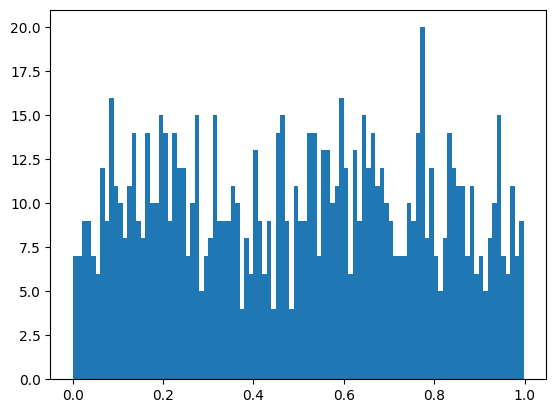

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Number of agents
N = 1000

# Wealth
wealth_arr = np.array([random.uniform(0, 1) for _ in range(N)])
plt.hist(wealth_arr, bins=100)  

In [26]:
def gini(arr):
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr.sort()
    if isinstance(arr, list):
        n = len(arr)
    elif isinstance(arr, np.ndarray):
        n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

gini(wealth_arr)

np.float64(0.3282604539045697)

In [27]:
from grid_search import run_model

df_model, df_agent = run_model({
    'num_steps':            100, 
    'wealth_arr':           wealth_arr[:100], 
    'fraction_stolen':      0.6, 
    'deterrence':           0.1
})

df_model

100%|██████████| 100/100 [00:00<00:00, 149.37it/s]


,crime_rate,gini_coef
0,0.00,0.319773
1,0.46,0.319773
2,0.69,0.427092
3,0.80,0.540566
4,0.89,0.554238
...,...,...
95,1.00,0.643131
96,1.00,0.685067
97,1.00,0.677416
98,1.00,0.663102


In [28]:
df_agent

criminal    wealth
Step AgentID                    
0    0           False  0.969201
     1           False  0.009526
     2           False  0.409253
     3           False  0.886512
     4           False  0.580219
...                ...       ...
99   96           True  0.108316
     8            True  0.000000
     68           True  0.111192
     59           True  0.193884
     52           True  0.655307

[10000 rows x 2 columns]

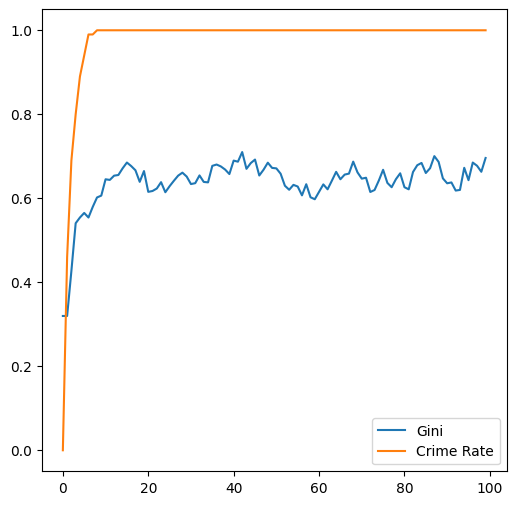

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[6,6])
ax.plot(df_model.index, df_model['gini_coef'], label='Gini')
ax.plot(df_model.index, df_model['crime_rate'], label='Crime Rate')
ax.legend()

In [30]:
from grid_search import run_grid_search

results = run_grid_search({
    'num_steps':            [100], 
    'wealth_arr':           [wealth_arr[:100]], 
    'fraction_stolen':      np.arange(0.1, 1.0, 0.1),
    'deterrence':           np.arange(0.1, 1.0, 0.1) 
})

results

Run 1/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.1
deterrence: 0.1


100%|██████████| 100/100 [00:00<00:00, 130.32it/s]


Done.

Run 2/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.1
deterrence: 0.2


100%|██████████| 100/100 [00:00<00:00, 132.08it/s]


Done.

Run 3/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.1
deterrence: 0.30000000000000004


100%|██████████| 100/100 [00:00<00:00, 124.66it/s]


Done.

Run 4/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.1
deterrence: 0.4


100%|██████████| 100/100 [00:00<00:00, 141.67it/s]


Done.

Run 5/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.1
deterrence: 0.5


100%|██████████| 100/100 [00:00<00:00, 133.37it/s]


Done.

Run 6/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.1
deterrence: 0.6


100%|██████████| 100/100 [00:00<00:00, 132.20it/s]


Done.

Run 7/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.1
deterrence: 0.7000000000000001


100%|██████████| 100/100 [00:00<00:00, 147.18it/s]


Done.

Run 8/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.1
deterrence: 0.8


100%|██████████| 100/100 [00:00<00:00, 132.63it/s]


Done.

Run 9/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.1
deterrence: 0.9


100%|██████████| 100/100 [00:00<00:00, 131.65it/s]


Done.

Run 10/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.2
deterrence: 0.1


100%|██████████| 100/100 [00:00<00:00, 128.19it/s]


Done.

Run 11/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.2
deterrence: 0.2


100%|██████████| 100/100 [00:00<00:00, 145.95it/s]


Done.

Run 12/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.2
deterrence: 0.30000000000000004


100%|██████████| 100/100 [00:00<00:00, 134.99it/s]


Done.

Run 13/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.2
deterrence: 0.4


100%|██████████| 100/100 [00:00<00:00, 143.39it/s]


Done.

Run 14/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.2
deterrence: 0.5


100%|██████████| 100/100 [00:00<00:00, 193.58it/s]


Done.

Run 15/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.2
deterrence: 0.6


100%|██████████| 100/100 [00:00<00:00, 193.45it/s]


Done.

Run 16/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.2
deterrence: 0.7000000000000001


100%|██████████| 100/100 [00:00<00:00, 154.94it/s]


Done.

Run 17/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.2
deterrence: 0.8


100%|██████████| 100/100 [00:00<00:00, 160.34it/s]


Done.

Run 18/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.2
deterrence: 0.9


100%|██████████| 100/100 [00:00<00:00, 145.60it/s]


Done.

Run 19/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.30000000000000004
deterrence: 0.1


100%|██████████| 100/100 [00:00<00:00, 170.09it/s]


Done.

Run 20/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.30000000000000004
deterrence: 0.2


100%|██████████| 100/100 [00:00<00:00, 142.76it/s]


Done.

Run 21/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.30000000000000004
deterrence: 0.30000000000000004


100%|██████████| 100/100 [00:00<00:00, 170.65it/s]


Done.

Run 22/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.30000000000000004
deterrence: 0.4


100%|██████████| 100/100 [00:00<00:00, 173.11it/s]


Done.

Run 23/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.30000000000000004
deterrence: 0.5


100%|██████████| 100/100 [00:00<00:00, 169.67it/s]


Done.

Run 24/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.30000000000000004
deterrence: 0.6


100%|██████████| 100/100 [00:00<00:00, 124.72it/s]


Done.

Run 25/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.30000000000000004
deterrence: 0.7000000000000001


100%|██████████| 100/100 [00:00<00:00, 176.51it/s]


Done.

Run 26/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.30000000000000004
deterrence: 0.8


100%|██████████| 100/100 [00:00<00:00, 168.08it/s]


Done.

Run 27/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.30000000000000004
deterrence: 0.9


100%|██████████| 100/100 [00:00<00:00, 160.25it/s]


Done.

Run 28/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.4
deterrence: 0.1


100%|██████████| 100/100 [00:00<00:00, 146.68it/s]


Done.

Run 29/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.4
deterrence: 0.2


100%|██████████| 100/100 [00:00<00:00, 162.23it/s]


Done.

Run 30/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.4
deterrence: 0.30000000000000004


100%|██████████| 100/100 [00:00<00:00, 142.64it/s]


Done.

Run 31/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.4
deterrence: 0.4


100%|██████████| 100/100 [00:00<00:00, 127.29it/s]


Done.

Run 32/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.4
deterrence: 0.5


100%|██████████| 100/100 [00:00<00:00, 171.32it/s]


Done.

Run 33/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.4
deterrence: 0.6


100%|██████████| 100/100 [00:00<00:00, 187.40it/s]


Done.

Run 34/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.4
deterrence: 0.7000000000000001


100%|██████████| 100/100 [00:00<00:00, 161.08it/s]


Done.

Run 35/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.4
deterrence: 0.8


100%|██████████| 100/100 [00:00<00:00, 164.71it/s]


Done.

Run 36/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.4
deterrence: 0.9


100%|██████████| 100/100 [00:00<00:00, 198.12it/s]


Done.

Run 37/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.5
deterrence: 0.1


100%|██████████| 100/100 [00:00<00:00, 162.13it/s]


Done.

Run 38/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.5
deterrence: 0.2


100%|██████████| 100/100 [00:00<00:00, 185.70it/s]


Done.

Run 39/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.5
deterrence: 0.30000000000000004


100%|██████████| 100/100 [00:00<00:00, 158.15it/s]


Done.

Run 40/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.5
deterrence: 0.4


100%|██████████| 100/100 [00:00<00:00, 170.89it/s]


Done.

Run 41/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.5
deterrence: 0.5


100%|██████████| 100/100 [00:00<00:00, 149.30it/s]


Done.

Run 42/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.5
deterrence: 0.6


100%|██████████| 100/100 [00:00<00:00, 187.36it/s]


Done.

Run 43/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.5
deterrence: 0.7000000000000001


100%|██████████| 100/100 [00:00<00:00, 169.40it/s]


Done.

Run 44/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.5
deterrence: 0.8


100%|██████████| 100/100 [00:00<00:00, 232.16it/s]


Done.

Run 45/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.5
deterrence: 0.9


100%|██████████| 100/100 [00:00<00:00, 228.50it/s]


Done.

Run 46/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.6
deterrence: 0.1


100%|██████████| 100/100 [00:00<00:00, 167.48it/s]


Done.

Run 47/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.6
deterrence: 0.2


100%|██████████| 100/100 [00:00<00:00, 190.22it/s]


Done.

Run 48/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.6
deterrence: 0.30000000000000004


100%|██████████| 100/100 [00:00<00:00, 209.10it/s]


Done.

Run 49/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.6
deterrence: 0.4


100%|██████████| 100/100 [00:00<00:00, 153.72it/s]


Done.

Run 50/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.6
deterrence: 0.5


100%|██████████| 100/100 [00:00<00:00, 130.03it/s]


Done.

Run 51/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.6
deterrence: 0.6


100%|██████████| 100/100 [00:00<00:00, 126.33it/s]


Done.

Run 52/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.6
deterrence: 0.7000000000000001


100%|██████████| 100/100 [00:00<00:00, 136.53it/s]


Done.

Run 53/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.6
deterrence: 0.8


100%|██████████| 100/100 [00:00<00:00, 152.75it/s]


Done.

Run 54/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.6
deterrence: 0.9


100%|██████████| 100/100 [00:00<00:00, 130.50it/s]


Done.

Run 55/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.7000000000000001
deterrence: 0.1


100%|██████████| 100/100 [00:00<00:00, 127.48it/s]


Done.

Run 56/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.7000000000000001
deterrence: 0.2


100%|██████████| 100/100 [00:00<00:00, 154.17it/s]


Done.

Run 57/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.7000000000000001
deterrence: 0.30000000000000004


100%|██████████| 100/100 [00:00<00:00, 121.21it/s]


Done.

Run 58/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.7000000000000001
deterrence: 0.4


100%|██████████| 100/100 [00:00<00:00, 158.19it/s]


Done.

Run 59/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.7000000000000001
deterrence: 0.5


100%|██████████| 100/100 [00:00<00:00, 193.72it/s]


Done.

Run 60/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.7000000000000001
deterrence: 0.6


100%|██████████| 100/100 [00:00<00:00, 179.24it/s]


Done.

Run 61/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.7000000000000001
deterrence: 0.7000000000000001


100%|██████████| 100/100 [00:00<00:00, 142.88it/s]


Done.

Run 62/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.7000000000000001
deterrence: 0.8


100%|██████████| 100/100 [00:00<00:00, 207.13it/s]


Done.

Run 63/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.7000000000000001
deterrence: 0.9


100%|██████████| 100/100 [00:00<00:00, 174.32it/s]


Done.

Run 64/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.8
deterrence: 0.1


100%|██████████| 100/100 [00:00<00:00, 180.38it/s]


Done.

Run 65/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.8
deterrence: 0.2


100%|██████████| 100/100 [00:00<00:00, 130.61it/s]


Done.

Run 66/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.8
deterrence: 0.30000000000000004


100%|██████████| 100/100 [00:00<00:00, 199.40it/s]


Done.

Run 67/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.8
deterrence: 0.4


100%|██████████| 100/100 [00:00<00:00, 193.42it/s]


Done.

Run 68/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.8
deterrence: 0.5


100%|██████████| 100/100 [00:00<00:00, 177.18it/s]


Done.

Run 69/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.8
deterrence: 0.6


100%|██████████| 100/100 [00:00<00:00, 136.98it/s]


Done.

Run 70/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.8
deterrence: 0.7000000000000001


100%|██████████| 100/100 [00:00<00:00, 206.92it/s]


Done.

Run 71/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.8
deterrence: 0.8


100%|██████████| 100/100 [00:00<00:00, 204.52it/s]


Done.

Run 72/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.8
deterrence: 0.9


100%|██████████| 100/100 [00:00<00:00, 146.39it/s]


Done.

Run 73/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.9
deterrence: 0.1


100%|██████████| 100/100 [00:00<00:00, 174.84it/s]


Done.

Run 74/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.9
deterrence: 0.2


100%|██████████| 100/100 [00:00<00:00, 214.35it/s]


Done.

Run 75/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.9
deterrence: 0.30000000000000004


100%|██████████| 100/100 [00:00<00:00, 200.41it/s]


Done.

Run 76/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.9
deterrence: 0.4


100%|██████████| 100/100 [00:00<00:00, 145.47it/s]


Done.

Run 77/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.9
deterrence: 0.5


100%|██████████| 100/100 [00:00<00:00, 118.13it/s]


Done.

Run 78/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.9
deterrence: 0.6


100%|██████████| 100/100 [00:00<00:00, 142.29it/s]


Done.

Run 79/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.9
deterrence: 0.7000000000000001


100%|██████████| 100/100 [00:00<00:00, 115.49it/s]


Done.

Run 80/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.9
deterrence: 0.8


100%|██████████| 100/100 [00:00<00:00, 144.80it/s]


Done.

Run 81/81
num_steps: 100
wealth_arr: 100 values
fraction_stolen: 0.9
deterrence: 0.9


100%|██████████| 100/100 [00:00<00:00, 173.14it/s]


Done.



[{'run_id': 0,
  'param': {'num_steps': 100,
   'wealth_arr': array([0.96920136, 0.00952611, 0.40925342, 0.88651219, 0.58021868,
          0.03614582, 0.90614223, 0.13566231, 0.64745615, 0.98016385,
          0.65181317, 0.30355983, 0.85563179, 0.93920567, 0.45128418,
          0.89767826, 0.32388099, 0.51979656, 0.99112832, 0.99764177,
          0.56495248, 0.24558078, 0.37295734, 0.42192236, 0.58646182,
          0.17218313, 0.62483421, 0.29675614, 0.23962455, 0.42768115,
          0.3503714 , 0.1259089 , 0.53463083, 0.3127415 , 0.46446089,
          0.81955813, 0.18867024, 0.18216085, 0.85457757, 0.39861995,
          0.4640167 , 0.57362667, 0.41995043, 0.16001683, 0.99237379,
          0.40875785, 0.55037927, 0.94067865, 0.14514898, 0.76481709,
          0.4195895 , 0.77274164, 0.24064033, 0.85303483, 0.35197426,
          0.55933043, 0.09319738, 0.34698289, 0.51148387, 0.71462616,
          0.80861371, 0.58614094, 0.68959297, 0.06441455, 0.82537446,
          0.57301194, 0.0997839

In [31]:
import pandas as pd
df_run = pd.DataFrame(results).set_index('run_id')
df_run

,param,df_model,df_agent
run_id,,,
0,"{'num_steps': 100, 'wealth_arr': [0.9692013612...",crime_rate gini_coef 0 0.00 0.3...,criminal wealth Step AgentID ...
1,"{'num_steps': 100, 'wealth_arr': [0.9692013612...",crime_rate gini_coef 0 0.00 0.3...,criminal wealth Step AgentID ...
2,"{'num_steps': 100, 'wealth_arr': [0.9692013612...",crime_rate gini_coef 0 0.00 0.3...,criminal wealth Step AgentID ...
3,"{'num_steps': 100, 'wealth_arr': [0.9692013612...",crime_rate gini_coef 0 0.00 0.3...,criminal wealth Step AgentID ...
4,"{'num_steps': 100, 'wealth_arr': [0.9692013612...",crime_rate gini_coef 0 0.00 0.3...,criminal wealth Step AgentID ...
...,...,...,...
76,"{'num_steps': 100, 'wealth_arr': [0.9692013612...",crime_rate gini_coef 0 0.00 0.3...,criminal wealth Step AgentID ...
77,"{'num_steps': 100, 'wealth_arr': [0.9692013612...",crime_rate gini_coef 0 0.00 0.3...,criminal wealth Step AgentID ...
78,"{'num_steps': 100, 'wealth_arr': [0.9692013612...",crime_rate gini_coef 0 0.00 0.3...,criminal wealth Step AgentID ...


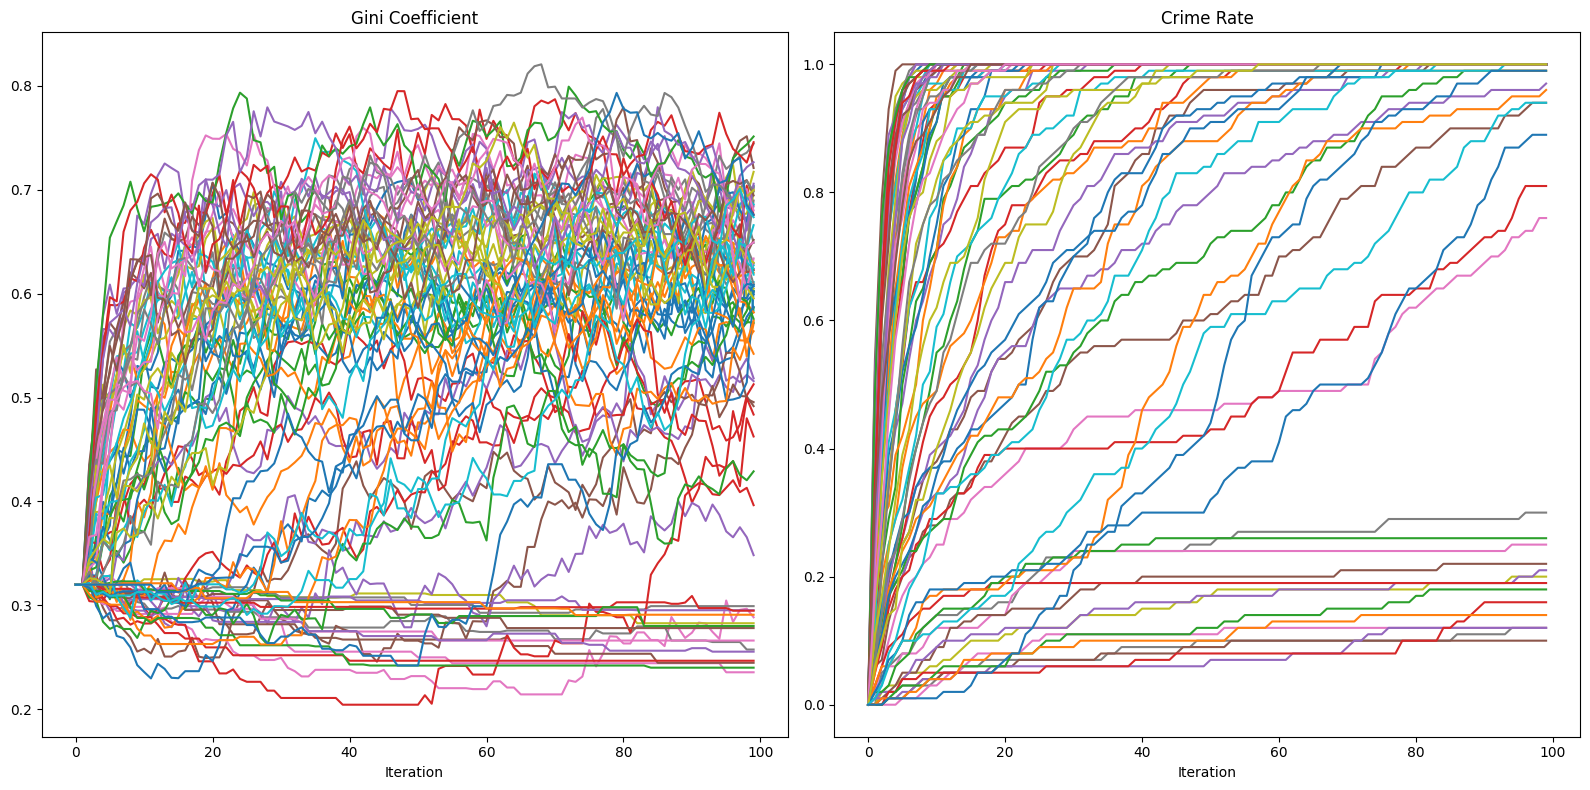

In [32]:
fig, ax = plt.subplots(ncols = 2, figsize=[16, 8])

for run_data in results:
    run_id = run_data['run_id']
    params = run_data['param']
    df_model = run_data['df_model']
    #df_agent = run_data['df_agent']
    ax[0].plot(df_model.index, df_model['gini_coef'], label=f'Run {run_id}')
    ax[1].plot(df_model.index, df_model['crime_rate'], label=f'Run {run_id}')

ax[0].set_title('Gini Coefficient')
ax[1].set_title('Crime Rate')
ax[0].set_xlabel('Iteration')
ax[1].set_xlabel('Iteration')
fig.tight_layout()
#ax.legend()

In [40]:
def get_end_gini_coef(df_model):
    return df_model.loc[df_model.index[-1], 'gini_coef']

def get_end_crime_rate(df_model):
    return df_model.loc[df_model.index[-1], 'crime_rate']

def parse_param(row):
    for key, value in row['param'].items():
        row[key] = value
    return row

df_run.loc[:, 'end_gini_coef'] = df_run['df_model'].apply(get_end_gini_coef)
df_run.loc[:, 'end_crime_rate'] = df_run['df_model'].apply(get_end_crime_rate)
df_run = df_run.apply(parse_param, axis=1)
df_run.drop(columns=['df_agent', 'df_model', 'wealth_arr', 'param'], inplace=True)
df_run

,param,end_gini_coef,end_crime_rate,num_steps,fraction_stolen,deterrence
run_id,,,,,,
0,"{'num_steps': 100, 'wealth_arr': [0.9692013612...",0.599349,1.00,100,0.1,0.1
1,"{'num_steps': 100, 'wealth_arr': [0.9692013612...",0.581966,1.00,100,0.1,0.2
2,"{'num_steps': 100, 'wealth_arr': [0.9692013612...",0.602810,1.00,100,0.1,0.3
3,"{'num_steps': 100, 'wealth_arr': [0.9692013612...",0.512715,1.00,100,0.1,0.4
4,"{'num_steps': 100, 'wealth_arr': [0.9692013612...",0.518461,1.00,100,0.1,0.5
...,...,...,...,...,...,...
76,"{'num_steps': 100, 'wealth_arr': [0.9692013612...",0.649464,1.00,100,0.9,0.5
77,"{'num_steps': 100, 'wealth_arr': [0.9692013612...",0.698635,1.00,100,0.9,0.6
78,"{'num_steps': 100, 'wealth_arr': [0.9692013612...",0.699658,1.00,100,0.9,0.7


<Axes: ylabel='Frequency'>

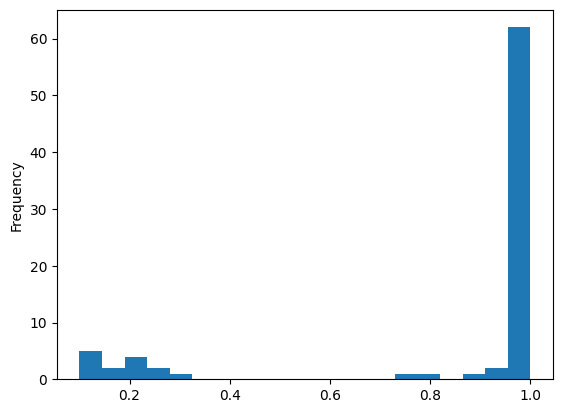

In [43]:
df_run.end_crime_rate.plot.hist(bins=20)

<Axes: xlabel='fraction_stolen', ylabel='deterrence'>

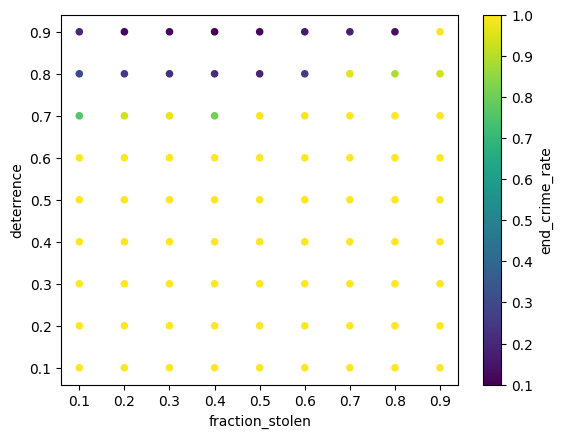

In [44]:
df_run.plot(kind='scatter', x='fraction_stolen', y='deterrence', c='end_crime_rate', colormap='viridis')

<Axes: xlabel='fraction_stolen', ylabel='deterrence'>

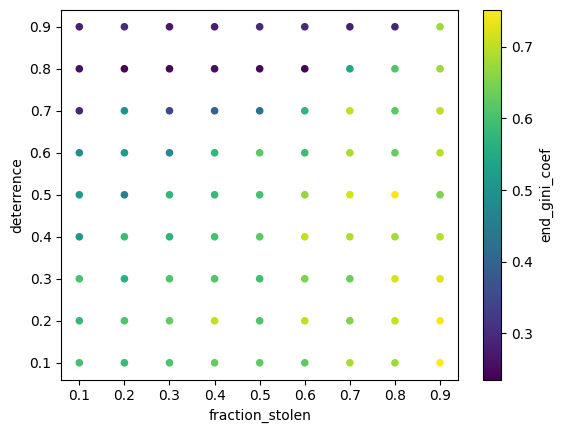

In [45]:
df_run.plot(kind='scatter', x='fraction_stolen', y='deterrence', c='end_gini_coef', colormap='viridis')

<Axes: xlabel='end_gini_coef', ylabel='end_crime_rate'>

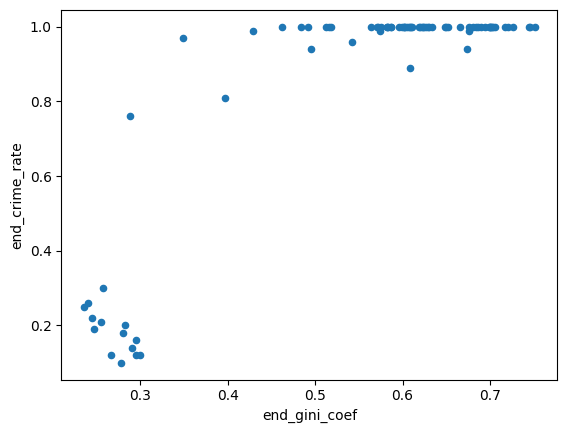

In [46]:
df_run.plot(kind='scatter', x='end_gini_coef', y='end_crime_rate')